# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [118]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install tf-nightly

In [119]:
%tensorflow_version 2.x

In [120]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.7.0
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [121]:
A = tf.constant( [[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [122]:
w = tf.Variable([[1.], [2.]])
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Тензор, заполненный только единицами

In [123]:
x = tf.ones(shape=(1, 2))
print(x)

tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


Тензор, заполненный только нулями:

In [124]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Cлучайные тензоры

In [125]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.78015053]
 [-0.11903024]
 [ 1.390667  ]], shape=(3, 1), dtype=float32)


In [126]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.53701925],
       [-0.13214248],
       [-1.0237484 ]], dtype=float32)>


Состояние переменной можно изменить с помощью метода assign

In [127]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [128]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Пример изменения размерности тензора - 

In [129]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример сложения тензеров - 

In [130]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Для переменных можно еще и так (добавить к тому. что есть)

In [131]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [132]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


In [133]:
x = tf.matmul([[5]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Можно много всякого похожего на numpy

In [134]:
a = tf.ones((2, 2)) * 2
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)



tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142137 1.4142137]
 [1.4142137 1.4142137]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


In [135]:
import numpy as np

ndarray = np.ones([3, 3])

print("превратим numpy arrays в Tensors ")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор в  numpy array")
print(tensor.numpy())

превратим numpy arrays в Tensors 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор в  numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


Проверяем работу GPU

https://www.tensorflow.org/guide/gpu

In [136]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


Сделаем по 10 циклов на GPU и CPU:

In [137]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 циклов: {:0.2f}ms".format(1000*result))

# исполнение CPU
print(" CPU работает:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print(" какой GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

 CPU работает:
10 циклов: 343.05ms
 какой GPU:
10 циклов: 1.41ms


ГЛАВНЫЙ ФОКУС!!!
Вычисляем производные (для дифференцируемых функций)

In [138]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print('input_var : ',input_var)
print('result = input_var^2 : ',result)
print('gradient : ',gradient)


input_var :  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result = input_var^2 :  tf.Tensor(9.0, shape=(), dtype=float32)
gradient :  tf.Tensor(6.0, shape=(), dtype=float32)


Производная второго порядка:

In [139]:
import numpy as np
import matplotlib.pyplot as plt

input_t = tf.Variable(np.arange(10), dtype='float32')
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    x =  4.9 * input_t ** 2  # g * t^2 /2
  speed = inner_tape.gradient(x, input_t)  # g * t
acceleration = outer_tape.gradient(speed, input_t)   # g 


print('x : ',x)
print('t : ',input_t)
print('v : ',speed)
print('a : ',acceleration)

x :  tf.Tensor(
[  0.         4.9       19.6       44.100002  78.4      122.49999
 176.40001  240.09999  313.6      396.9     ], shape=(10,), dtype=float32)
t :  <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>
v :  tf.Tensor(
[ 0.        9.8      19.6      29.400002 39.2      49.       58.800003
 68.600006 78.4      88.200005], shape=(10,), dtype=float32)
a :  tf.Tensor([9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8], shape=(10,), dtype=float32)


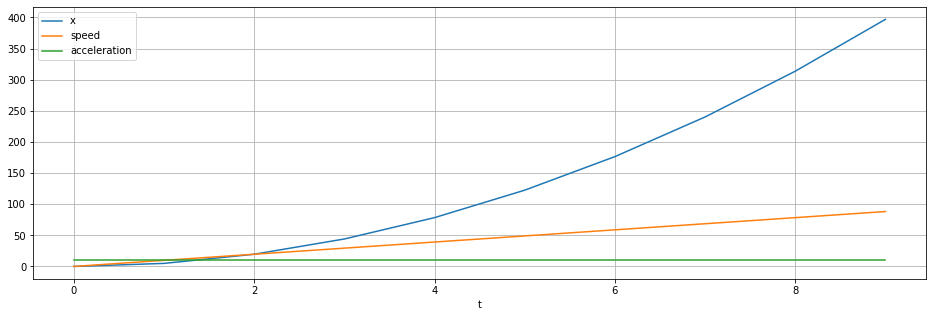

In [140]:
plt.figure(figsize=(16,5))
plt.plot(input_t.numpy(), x.numpy(), label = 'x')
plt.plot(input_t.numpy(), speed.numpy(), label = 'speed')
plt.plot(input_t.numpy(), acceleration.numpy(), label = 'acceleration')
plt.legend()
plt.xlabel('t')
plt.grid('on')
plt.show()

В отличие от графического процессора, использование TPU требует явного подключения к работнику TPU. Поэтому необходимо настроить свое обучение и определение логического вывода, чтобы наблюдать ускорение

пример работы с TPU на будущее

https://www.tensorflow.org/guide/tpu

https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb

Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

In [141]:
from tensorflow.keras.datasets import mnist


(train_images,train_labels),(test_images,testn_labels)=mnist.load_data()

# Нормализация.
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# векторизация.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)



(60000, 784)
(10000, 784)


In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [143]:
import matplotlib.pyplot as plt


In [144]:
bigger_model = Sequential([
    Dense( 512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 512)               401920    
                                                                 
 dense_50 (Dense)            (None, 512)               262656    
                                                                 
 dense_51 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [145]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
                                  epochs=5,
                                  batch_size=2000, validation_split=0.2)

Epoch 1/5
24/24 [==============================] - 1s 24ms/step - loss: 1.2550 - accuracy: 0.6560 - val_loss: 0.3950 - val_accuracy: 0.8845
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.3531 - accuracy: 0.8943 - val_loss: 0.2713 - val_accuracy: 0.9197
Epoch 3/5
24/24 [==============================] - 0s 15ms/step - loss: 0.2495 - accuracy: 0.9269 - val_loss: 0.2088 - val_accuracy: 0.9400
Epoch 4/5
24/24 [==============================] - 0s 15ms/step - loss: 0.1946 - accuracy: 0.9429 - val_loss: 0.1746 - val_accuracy: 0.9492
Epoch 5/5
24/24 [==============================] - 0s 16ms/step - loss: 0.1581 - accuracy: 0.9531 - val_loss: 0.1514 - val_accuracy: 0.9570


Работа на GPU и СPU



Строго GPU:

In [146]:
print("On GPU:")
with tf.device("GPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2)

On GPU:
Epoch 1/5
24/24 [==============================] - 0s 17ms/step - loss: 0.1327 - accuracy: 0.9613 - val_loss: 0.1377 - val_accuracy: 0.9603
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.1135 - accuracy: 0.9668 - val_loss: 0.1273 - val_accuracy: 0.9625
Epoch 3/5
24/24 [==============================] - 0s 14ms/step - loss: 0.1006 - accuracy: 0.9704 - val_loss: 0.1108 - val_accuracy: 0.9672
Epoch 4/5
24/24 [==============================] - 0s 14ms/step - loss: 0.0856 - accuracy: 0.9753 - val_loss: 0.1106 - val_accuracy: 0.9676
Epoch 5/5
24/24 [==============================] - 0s 15ms/step - loss: 0.0775 - accuracy: 0.9777 - val_loss: 0.1076 - val_accuracy: 0.9676


Строго CPU:

In [147]:
print("On CPU:")
with tf.device("CPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2)


On CPU:
Epoch 1/5
24/24 [==============================] - 3s 135ms/step - loss: 0.0705 - accuracy: 0.9794 - val_loss: 0.1005 - val_accuracy: 0.9694
Epoch 2/5
24/24 [==============================] - 3s 130ms/step - loss: 0.0609 - accuracy: 0.9823 - val_loss: 0.0967 - val_accuracy: 0.9705
Epoch 3/5
24/24 [==============================] - 3s 135ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0941 - val_accuracy: 0.9716
Epoch 4/5
24/24 [==============================] - 3s 134ms/step - loss: 0.0459 - accuracy: 0.9871 - val_loss: 0.0910 - val_accuracy: 0.9724
Epoch 5/5
24/24 [==============================] - 3s 133ms/step - loss: 0.0425 - accuracy: 0.9886 - val_loss: 0.0915 - val_accuracy: 0.9720


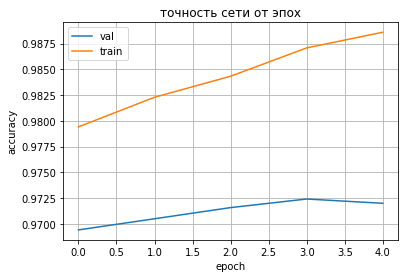

In [148]:
plt.plot(bigger_history.history['val_accuracy'] ,label='val')
plt.plot(bigger_history.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Выбрать из возможностей CPU/GPU

In [149]:
# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print("  GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    
    bigger_model.fit( train_images, to_categorical(train_labels,10), epochs=1,batch_size=2000, validation_split=0.2)

  GPU:
24/24 [==============================] - 0s 18ms/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.0945 - val_accuracy: 0.9695


In [150]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
                                  epochs=5,
                                  batch_size=2000, validation_split=0.2)

Epoch 1/5
24/24 [==============================] - 0s 17ms/step - loss: 0.0359 - accuracy: 0.9901 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.0341 - accuracy: 0.9906 - val_loss: 0.0930 - val_accuracy: 0.9712
Epoch 3/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0312 - accuracy: 0.9915 - val_loss: 0.0876 - val_accuracy: 0.9746
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0247 - accuracy: 0.9940 - val_loss: 0.0872 - val_accuracy: 0.9738
Epoch 5/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0256 - accuracy: 0.9934 - val_loss: 0.0852 - val_accuracy: 0.9748


Построим еще моделей

In [151]:
bigger_model2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_history2 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 1s 21ms/step - loss: 1.1691 - accuracy: 0.6707 - val_loss: 0.3976 - val_accuracy: 0.8841
Epoch 2/5
24/24 [==============================] - 0s 13ms/step - loss: 0.3498 - accuracy: 0.8968 - val_loss: 0.2707 - val_accuracy: 0.9205
Epoch 3/5
24/24 [==============================] - 0s 14ms/step - loss: 0.2542 - accuracy: 0.9261 - val_loss: 0.2145 - val_accuracy: 0.9386
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.2011 - accuracy: 0.9415 - val_loss: 0.1771 - val_accuracy: 0.9509
Epoch 5/5
24/24 [==============================] - 0s 13ms/step - loss: 0.1629 - accuracy: 0.9532 - val_loss: 0.1522 - val_accuracy: 0.9583


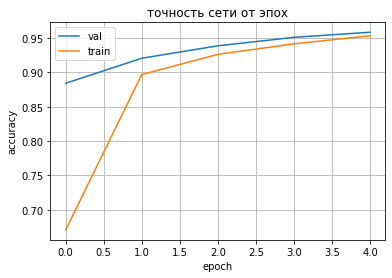

In [152]:
plt.plot(bigger_history2.history['val_accuracy'] ,label='val')
plt.plot(bigger_history2.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

И еще одну

In [153]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 0s 16ms/step - loss: 0.1367 - accuracy: 0.9612 - val_loss: 0.1371 - val_accuracy: 0.9617
Epoch 2/5
24/24 [==============================] - 0s 12ms/step - loss: 0.1142 - accuracy: 0.9678 - val_loss: 0.1266 - val_accuracy: 0.9620
Epoch 3/5
24/24 [==============================] - 0s 12ms/step - loss: 0.0981 - accuracy: 0.9721 - val_loss: 0.1151 - val_accuracy: 0.9678
Epoch 4/5
24/24 [==============================] - 0s 12ms/step - loss: 0.0852 - accuracy: 0.9764 - val_loss: 0.1038 - val_accuracy: 0.9698
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.1023 - val_accuracy: 0.9701


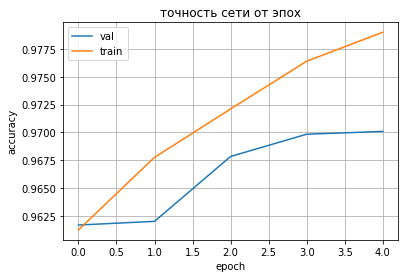

In [154]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [155]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=15,
  batch_size=2000, validation_split=0.2
)

Epoch 1/15
24/24 [==============================] - 0s 17ms/step - loss: 0.0689 - accuracy: 0.9802 - val_loss: 0.1121 - val_accuracy: 0.9668
Epoch 2/15
24/24 [==============================] - 0s 13ms/step - loss: 0.0637 - accuracy: 0.9813 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 3/15
24/24 [==============================] - 0s 14ms/step - loss: 0.0541 - accuracy: 0.9849 - val_loss: 0.0934 - val_accuracy: 0.9721
Epoch 4/15
24/24 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.9872 - val_loss: 0.0908 - val_accuracy: 0.9728
Epoch 5/15
24/24 [==============================] - 0s 14ms/step - loss: 0.0428 - accuracy: 0.9878 - val_loss: 0.0871 - val_accuracy: 0.9736
Epoch 6/15
24/24 [==============================] - 0s 11ms/step - loss: 0.0364 - accuracy: 0.9904 - val_loss: 0.0887 - val_accuracy: 0.9749
Epoch 7/15
24/24 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.9906 - val_loss: 0.0912 - val_accuracy: 0.9726
Epoch 8/15
24

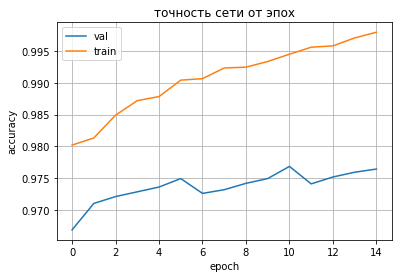

In [156]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

### Оптимизаторы

In [157]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

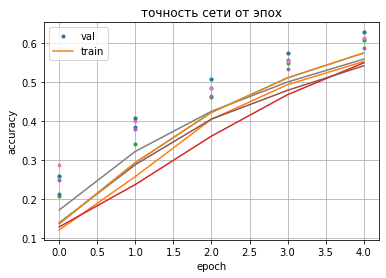

In [158]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0] 

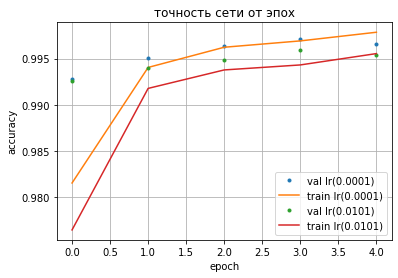

In [159]:
for i in [0,1]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(1, activation='sigmoid')  # нейронов на выходе 1 - для одного класса один выход ( бинарный классификатор)
                              ])

  bigger_model4.compile(optimizer= Adam(learning_rate=0.0001+0.01*i, beta_1=0.89) ,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.',label='val lr(' +str(0.0001+0.01*i)+')')
  plt.plot(bigger_history4.history['accuracy'] ,label='train lr(' +str(0.0001+0.01*i)+')')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [160]:
bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [161]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [162]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [163]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [164]:
train_images.shape

(60000, 28, 28)

In [165]:
len(train_labels)

60000

In [166]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [167]:
test_images.shape

(10000, 28, 28)

In [168]:
len(test_labels)

10000

In [169]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

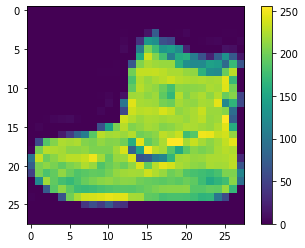

In [170]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [171]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

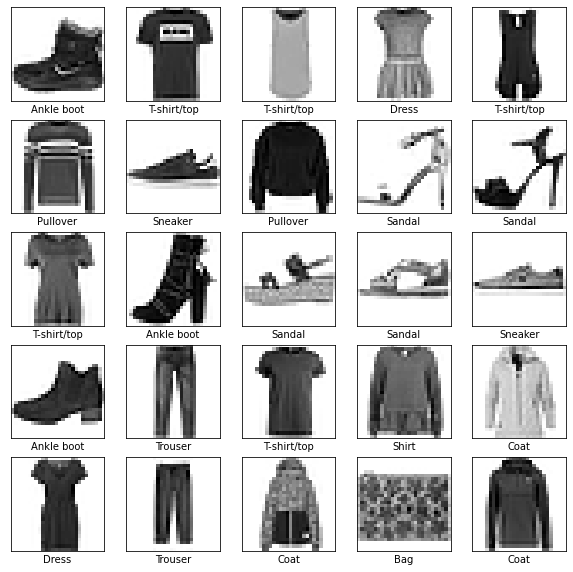

In [172]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [173]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Соберем модель в функциональной форме (функциональное API Keras) 

Сеть собираем как последовательности соединей узлов:
 
 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [174]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow

In [175]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dense_77 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [176]:
inputs = Input(shape=(28, 28))
x_1 = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x_1)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(   inputs,outputs)

In [177]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 128)               100480    
                                                                 
 dense_79 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [178]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [179]:
model.fit(train_images, y_train_labels, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 2s 3ms/step - loss: 0.5405 - accuracy: 0.8157
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3982 - accuracy: 0.8595
Epoch 3/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3593 - accuracy: 0.8713


In [180]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3905 - accuracy: 0.8626 - 922ms/epoch - 3ms/step

Test accuracy: 0.8626000285148621


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

In [181]:
y_p = model.predict(test_images[:1,:,:])

In [182]:
y_p

array([[-5.554009 , -9.8732195, -5.5777907, -6.8319216, -6.237816 ,
         1.4151407, -4.223576 ,  2.3057337, -1.0082465,  4.719064 ]],
      dtype=float32)

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [183]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [184]:
predictions = probability_model.predict(test_images)

In [185]:
predictions[0]

array([3.05832291e-05, 4.07075589e-07, 2.98645700e-05, 8.52105040e-06,
       1.54351328e-05, 3.25197279e-02, 1.15686584e-04, 7.92366862e-02,
       2.88192788e-03, 8.85161102e-01], dtype=float32)

In [186]:
np.argmax(predictions[0])

9

In [187]:
test_labels[0]

9

In [188]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

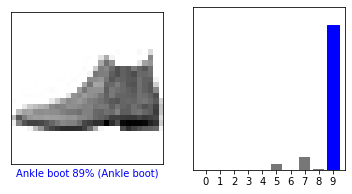

In [189]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

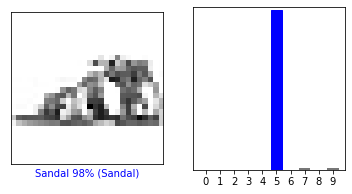

In [190]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

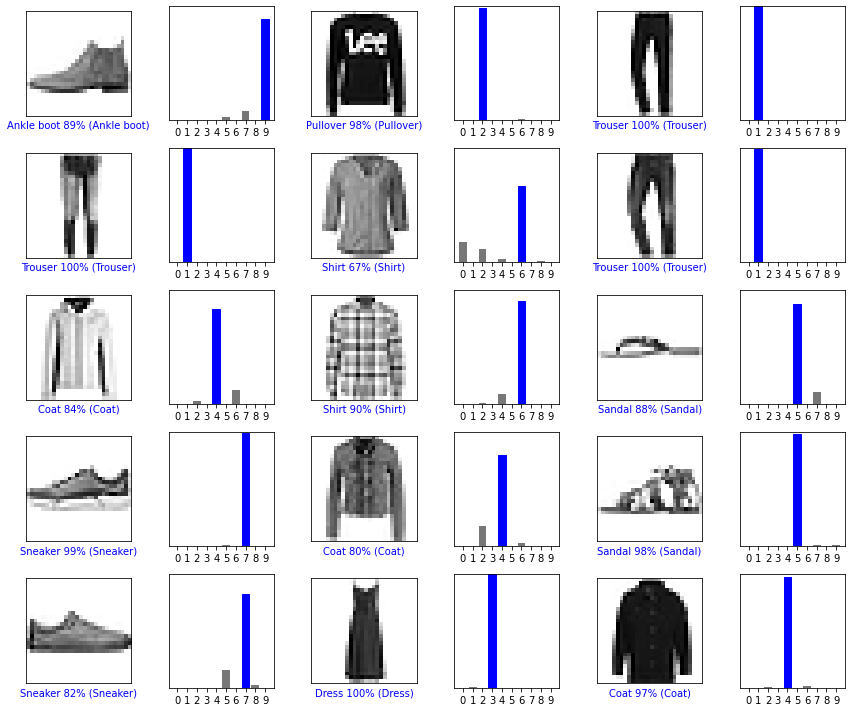

In [191]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [192]:

img1 = test_images[1]

print(img1.shape)

(28, 28)


In [193]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img1,0))

print(img.shape)

(1, 28, 28)


In [194]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4264729e-05 1.0646409e-07 9.8397070e-01 6.8221311e-07 7.4143149e-03
  6.1044336e-11 8.5772304e-03 4.3470652e-12 2.7195567e-06 5.0174063e-11]]


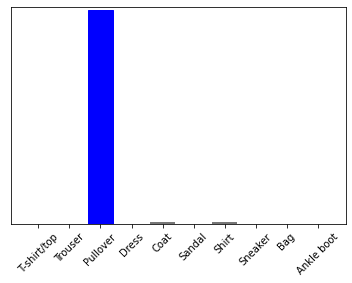

In [195]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [196]:
np.argmax(predictions_single[0])

2

## **Проведем анализ работы модели по слоям**

Состояние узлов в сети по эпохам (пакетам) и слоям можно оценить используя средства tensorflow через объект GradientTape() - исполняет шаг вычисления градиента для модели по ее loss для всех тренируемых весов модели (<имя модели>.trainable_weights) (см. https://www.tensorflow.org/guide/basic_training_loops, https://www.tensorflow.org/api_docs/python/tf/GradientTape)


данные для обучения получим из tensorflow.data.Dataset (https://www.tensorflow.org/guide/data), куда передаем выборку , а на выходе получаем генератор пакетов заданного размера

In [197]:
# собираем сеть
level =5
inputs = Input(shape=(28,28,1), name='digits') 
x=Flatten()(inputs)
for i in range(level):
  #x = Dense(64, activation='relu', name='dense_'+str(i))(x) 
  x = Dense(64, activation='sigmoid', name='dense_'+str(i))(x) 
outputs = Dense(10, activation='sigmoid' ,name='predictions')(x) 
modelg = Model(inputs=inputs, outputs=outputs) 




# Создадим экземпляр оптимизатора. 
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3) 
# Instantiate a loss function. 
loss_fn = tensorflow.keras.losses.MeanSquaredError() #(from_logits=True) 
# Подготовим тренировочный датасет. 
batch_size = 64 
train_dataset = tensorflow.data.Dataset.from_tensor_slices((train_images, y_train_labels)) 
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size) 
# Итерируем по эпохам.
grad_log=[]

epochs=2  # учим немного, т.к. задача посмотреть , что происходит с градиентом
for epoch in range(epochs): 
  print('Начинаем эпоху %d' % (epoch,)) 
  # Итерируем по пакетам в датасете. 
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset): 
    # Откроем GradientTape чтобы записать операции # выполняемые во время прямого прохода, 
    #включающего автодифференцирование. 
    with tensorflow.GradientTape() as tape: 
      # Запустим прямой проход слоя. 
      # Операции применяемые слоем к своим 
      # входным данным будут записаны 
      # на GradientTape. 
      loggits = modelg(x_batch_train) 
      # loggits для пакета  - выходы модели 
      # Вычислим значение потерь для этого пакета. 
      y_s=y_batch_train.numpy().shape
      y  = tensorflow.reshape( y_batch_train,shape=(y_s[0],10,1))
      l = tensorflow.reshape( loggits,shape=(y_s[0],10,1))
      # вызываем лосс
      loss_value = loss_fn(y, l) 
      # Используем gradient tape для автоматического извлечения градиентов 
      # обучаемых переменных относительно потерь. 
      grads = tape.gradient(loss_value, modelg.trainable_weights) 
      g_g=[]
      w_w =[]
      # пишем логи для сохранения значений градиента и веса по одной цепи 
      # (0-й канал распространения активности)
      for g_s in grads:
        # допишем логи значений градиента в зависимости от размера тензора градиента
        if len(g_s.numpy().shape)==1:
         
          g_g.append(g_s.numpy()[0])
        if len(g_s.numpy().shape)==2:
          
          g_g.append(g_s.numpy()[0,0]) 
        if len(g_s.numpy().shape)==3:
          
          g_g.append(g_s.numpy()[0,0,0]) 
        if len(g_s.numpy().shape)==4:
          
          g_g.append(g_s.numpy()[0,0,0,0])  

              
      # добавляем текущие логи по слоям к общей записи
      grad_log.append(g_g)

      # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери. 
      optimizer.apply_gradients(zip(grads, modelg.trainable_weights)) 
      # Пишем лог каждые 200 пакетов. 
      if step % 200 == 0: 
        print('Потери на обучении (для одного пакета) на шаге %s: %s' % (step, float(loss_value))) 
        print('Уже увидели: %s примеров' % ((step + 1) * batch_size))
grad_log=np.array(grad_log)



Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.239270880818367
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.23093965649604797
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.21426565945148468
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.20999297499656677
Уже увидели: 38464 примеров
Потери на обучении (для одного пакета) на шаге 800: 0.19845113158226013
Уже увидели: 51264 примеров
Начинаем эпоху 1
Потери на обучении (для одного пакета) на шаге 0: 0.19412803649902344
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.1862368881702423
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.17703941464424133
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.16587531566619873
Уже увидели: 38464 примеров
Потери на обучении (для одного пакета) на шаге 800: 0.16508783400058746
Уже уви

In [198]:
modelg.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_0 (Dense)             (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                416

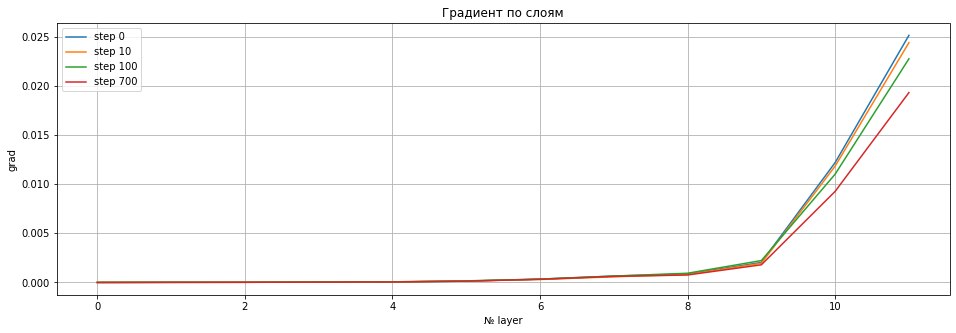

In [199]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.plot(np.abs(grad_log[700,:]),label='step 700')
plt.legend()
plt.show()

### Сделаем анализ ошибок модели

In [200]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [201]:
y_pred = np.argmax(probability_model.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [202]:
CM = confusion_matrix(test_labels,y_pred)
print(CM)

[[805   1  12  31  10   0 130   0  11   0]
 [  3 960   4  24   5   0   3   0   1   0]
 [ 13   2 715   8 189   0  71   0   2   0]
 [ 26   9   7 837  76   0  40   0   5   0]
 [  0   0  61  14 871   0  52   0   2   0]
 [  0   0   0   1   0 919   0  52   2  26]
 [115   1  95  23 106   0 648   0  12   0]
 [  0   0   0   0   0  14   0 965   0  21]
 [  3   1   6   4   8   1  16   7 954   0]
 [  0   0   0   0   0   2   1  45   0 952]]


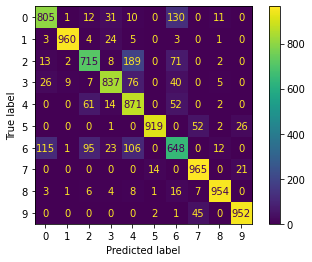

In [203]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

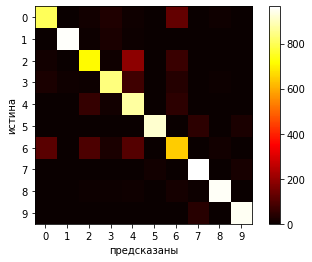

In [204]:
plt.imshow(CM, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.yticks(ticks=np.arange(10))
plt.xticks(ticks=np.arange(10))
plt.xlabel('предсказаны')
plt.ylabel('истина')
plt.show()

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание

У всех 3-х сетей предпоследний слой линейный (это не правильно для классификации и сделано, что бы модель была совсем простой)




In [205]:
# заполняем модель списком
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# заполняем модель , добавляя слои последовательно 
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28, 28)))
model2.add(keras.layers.Dense(256, activation='linear'))
model2.add(keras.layers.Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
x_input = keras.layers.Input(shape=(28,28))
x3 = keras.layers.Flatten()(x_input)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x_output = keras.layers.Dense(10, activation='softmax')(x3)
model3=keras.models.Model(x_input,x_output)

model1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist1=model1.fit(train_images, train_labels, epochs=5)
hist2=model2.fit(train_images, train_labels, epochs=5)
hist3=model3.fit(train_images, train_labels, epochs=5)



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 1.2873 - accuracy: 0.6655
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7649 - accuracy: 0.7592
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6531 - accuracy: 0.7808
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5969 - accuracy: 0.7959
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5609 - accuracy: 0.8066
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5971 - accuracy: 0.7969
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4770 - accuracy: 0.8338
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4561 - accuracy: 0.8413
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4451 - accuracy: 0.8464
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4363 - accuracy: 0.8492


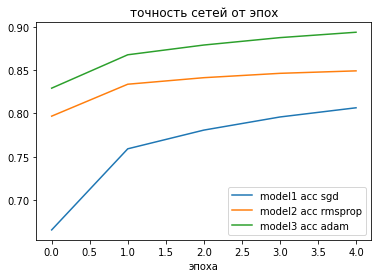

In [206]:
plt.plot(hist1.history['accuracy'],label='model1 acc sgd')
plt.plot(hist2.history['accuracy'],label='model2 acc rmsprop')
plt.plot(hist3.history['accuracy'],label ='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [207]:
y_pred1 = np.argmax(model1.predict(test_images),axis=1)
y_pred2 = np.argmax(model2.predict(test_images),axis=1)
y_pred3 = np.argmax(model3.predict(test_images),axis=1)

CM1 = confusion_matrix(test_labels,y_pred1)
CM2 = confusion_matrix(test_labels,y_pred2)
CM3 = confusion_matrix(test_labels,y_pred3)

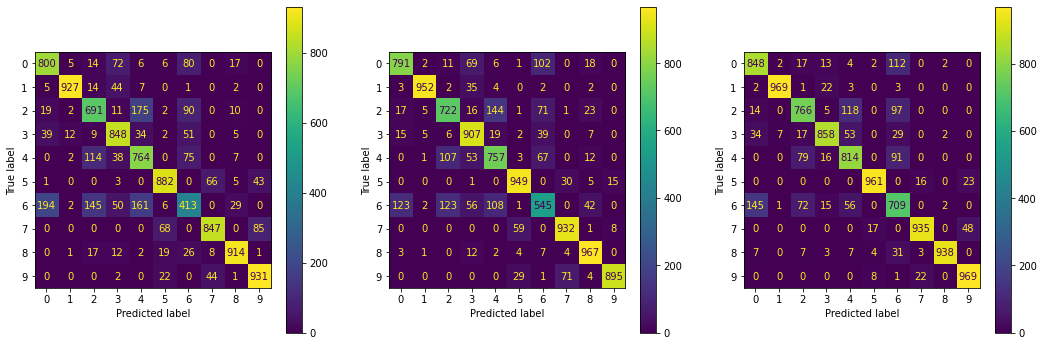

In [208]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=np.arange(10))
disp1.plot( ax=ax1, values_format ='.3g')
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=np.arange(10))
disp2.plot( ax=ax2, values_format ='.3g')
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=np.arange(10))
disp3.plot( ax=ax3, values_format ='.3g')
plt.show()

In [209]:
# сохранить модели на диск.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# прочитать модели с диска (перед этим, нужно положить их в каталог для работы виртуальной машины Колаборатории):
# model.load_weights('model.h5')

Выгрузим на локальную машину нашу модель

In [210]:
from google.colab import files

files.download('model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
x3

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_84')>

Сделаем предсказание на тестовом изображении

In [212]:
y_pred = model3.predict(test_images)
y_pred_arg = np.argmax(y_pred, axis=1)


Отобразим значения на выходах сети (10 выходов - 10 точек графика)

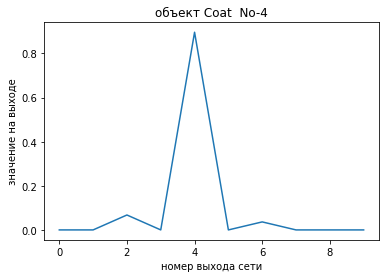

In [213]:
N = 10 
plt.plot(y_pred[N,:])
plt.title('объект ' +class_names[test_labels[N]]+ '  No-'+str(test_labels[N]))
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [214]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.3488 - accuracy: 0.8767 - 836ms/epoch - 3ms/step


### **Ансамбль сетей**

Использование функционального API для построения сложных сетей

In [215]:
input1 = keras.layers.Input(shape=(28, 28))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 =keras.layers.Dense(10, activation='softmax')(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)


x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2=keras.layers.Dense(10, activation='softmax')(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3=keras.layers.Dense(10, activation='softmax')(x3)


model33 =keras.models.Model(inputs=input1,outputs=x3)

# усредняем выходы сетей
out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)

model_all=keras.models.Model(inputs =[input1],outputs =out_all)
model_all.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [216]:
tf.keras.optimizers.Adam()

In [217]:
model_all.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_17 (Flatten)           (None, 784)          0           ['input_8[0][0]']                
                                                                                                  
 flatten_18 (Flatten)           (None, 784)          0           ['input_8[0][0]']                
                                                                                                  
 flatten_19 (Flatten)           (None, 784)          0           ['input_8[0][0]']                
                                                                                           

In [218]:
from tensorflow.keras.utils import plot_model

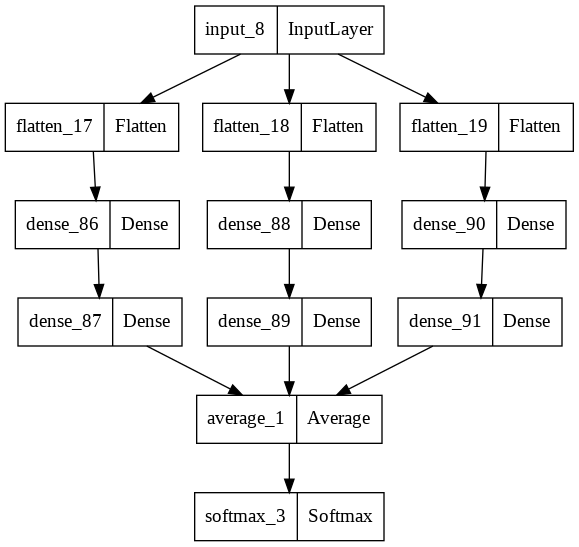

In [219]:
plot_model(model_all,to_file='new_model-all.png')

In [220]:
predictions_single=model_all.predict(img)

print(predictions_single)

[[0.08609661 0.08608023 0.2206386  0.08604953 0.08847178 0.08613021
  0.08816846 0.08603281 0.08629908 0.08603264]]


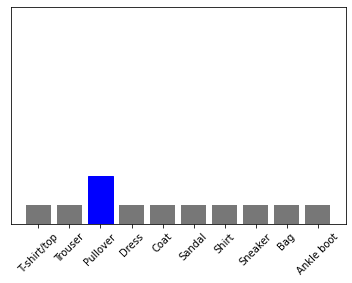

In [221]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [222]:
test_loss, test_acc = model_all.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 2.2186 - accuracy: 0.8531 - 1s/epoch - 4ms/step


In [223]:
model11.save('model_11.h5')

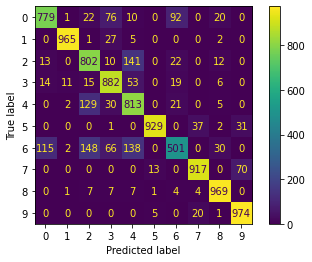

In [224]:
y_pred_all = np.argmax(model_all.predict(test_images),axis=1)

CM_all = confusion_matrix(test_labels,y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(  values_format ='.3g')
plt.show()

In [225]:
hist1=model_all.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1999 - accuracy: 0.8730
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1962 - accuracy: 0.8764
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1951 - accuracy: 0.8776
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1945 - accuracy: 0.8783
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1940 - accuracy: 0.8798


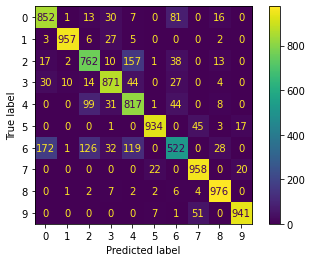

In [226]:
y_pred_all = np.argmax(model_all.predict(test_images),axis=1)

CM_all = confusion_matrix(test_labels,y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(  values_format ='.3g')
plt.show()

In [227]:
from tensorflow.keras.layers import Concatenate 

In [228]:
input6 = keras.layers.Input( shape=(28, 28) )
x6= keras.layers.Flatten()(input6)
x6 = keras.layers.Dense(256, activation='relu')(x6)
x6=keras.layers.Dense(1, activation='sigmoid')(x6)


model6 =Model(inputs=input6,outputs=x6)
model6.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model6.fit(train_images,y_train_labels[:,6], epochs = 10, validation_split = 0.2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1951 - accuracy: 0.9185 - val_loss: 0.2082 - val_accuracy: 0.9036
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1603 - accuracy: 0.9315 - val_loss: 0.1780 - val_accuracy: 0.9285
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1482 - accuracy: 0.9369 - val_loss: 0.1377 - val_accuracy: 0.9429
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1414 - accuracy: 0.9401 - val_loss: 0.1365 - val_accuracy: 0.9428
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1350 - accuracy: 0.9426 - val_loss: 0.1315 - val_accuracy: 0.9453
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1308 - accuracy: 0.9444 - val_loss: 0.1322 - val_accuracy: 0.9434
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1260 - accuracy: 0.9466 - val_loss: 0.1342 - val_accuracy:

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 

In [229]:
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [230]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
X_train, X_test, Y_train, Y_test = train_test_split(df, data.target, test_size = 0.2)
X_train.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
302,0.09266,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67
337,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
313,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90


In [231]:
X_train.shape

(404, 13)

In [234]:
input_b = keras.layers.Input( (X_train.shape[1]) )
x = keras.layers.Flatten()(input_b)
x = keras.layers.Dense(128, activation=tf.keras.activations.sigmoid)(x)
x = keras.layers.Dense(128, activation=tf.keras.activations.sigmoid)(x)
x = keras.layers.Dense(128, activation=tf.keras.activations.sigmoid)(x)
x = keras.layers.Dense(1, activation='linear')(x)


model_b =Model(inputs=input_b,outputs=x)
model_b.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mean_squared_error,
              metrics=tf.keras.metrics.mean_absolute_error)

model_b.fit(X_train, Y_train, epochs = 300, validation_split = 0.2)

Epoch 1/300
11/11 [==============================] - 1s 23ms/step - loss: 549.2366 - mean_absolute_error: 21.5714 - val_loss: 464.6718 - val_mean_absolute_error: 19.6425
Epoch 2/300
11/11 [==============================] - 0s 7ms/step - loss: 420.7783 - mean_absolute_error: 18.3390 - val_loss: 362.0523 - val_mean_absolute_error: 16.8452
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 338.1741 - mean_absolute_error: 15.9586 - val_loss: 304.5642 - val_mean_absolute_error: 15.0909
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 293.0810 - mean_absolute_error: 14.5200 - val_loss: 272.2218 - val_mean_absolute_error: 14.0319
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 265.5268 - mean_absolute_error: 13.5950 - val_loss: 249.4580 - val_mean_absolute_error: 13.2640
Epoch 6/300
11/11 [==============================] - 0s 7ms/step - loss: 244.3944 - mean_absolute_error: 12.8654 - val_loss: 230.5993 - val_mean_absolute_

In [235]:
model_b.evaluate(X_test, Y_test, verbose=0)

[20.220855712890625, 3.287184715270996]

In [236]:
prediction = model_b.predict(X_test)
metrics.r2_score(Y_test, prediction)

0.778905619594794

  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [266]:
layers = [2, 3]
neirouns = [128, 256]
activations = [tf.keras.activations.sigmoid, tf.keras.activations.relu]
optimizers = ['ADAM', 'RMSProp']

parameters_dic = {
    'Число слоев': np.array([]),
    'Число нейронов': np.array([]),
    'Функция активации': np.array([]),
    'Оптимизационая функция': np.array([]),
    'loss_MAE': np.array([]),
    'MAPE': np.array([]),
    'R2_score': np.array([]),
}

for layer in layers:
  for neiroun in neirouns:
    for activation in activations:
      for optimizer in optimizers:
        
        opt = tf.keras.optimizers.Adam() if optimizer == 'ADAM' else tf.keras.optimizers.RMSprop()

        input_boston = keras.layers.Input( (X_train.shape[1]) )
        x = keras.layers.Flatten()(input_b)
        for i in range(layer):
          x = keras.layers.Dense(neiroun, activation=activation)(x)
        x = keras.layers.Dense(1, activation='linear')(x)

        

        model_b =Model(inputs=input_b,outputs=x)
        model_b.compile(optimizer=opt,
                      loss=tf.keras.losses.MAE,
                      metrics=tf.keras.metrics.MAPE)

        model_b.fit(X_train, Y_train, epochs = 300, validation_split = 0.2, verbose=0)

        mae, mape = model_b.evaluate(X_test, Y_test, verbose=0)
        
        prediction = model_b.predict(X_test)
        r2_score = metrics.r2_score(Y_test, prediction)


        parameters_dic['Число слоев'] = np.append(parameters_dic['Число слоев'], layer)
        parameters_dic['Число нейронов'] = np.append(parameters_dic['Число нейронов'], neiroun)
        parameters_dic['Функция активации'] = np.append(parameters_dic['Функция активации'], 
                                                        'Сигмойда' if activation == tf.keras.activations.sigmoid else 'RELU')
        parameters_dic['Оптимизационая функция'] = np.append(parameters_dic['Оптимизационая функция'], optimizer)
        parameters_dic['loss_MAE'] = np.append(parameters_dic['loss_MAE'], mae)
        parameters_dic['MAPE'] = np.append(parameters_dic['MAPE'], mape)
        parameters_dic['R2_score'] = np.append(parameters_dic['R2_score'], r2_score)

pd.DataFrame(parameters_dic)


,Число слоев,Число нейронов,Функция активации,Оптимизационая функция,loss_MAE,MAPE,R2_score
0,2.0,128.0,Сигмойда,ADAM,3.538395,16.001564,0.734173
1,2.0,128.0,Сигмойда,RMSProp,3.058035,12.788754,0.726956
2,2.0,128.0,RELU,ADAM,3.686630,15.491452,0.641319
3,2.0,128.0,RELU,RMSProp,3.718155,14.785979,0.638549
4,2.0,256.0,Сигмойда,ADAM,3.299400,14.679656,0.754205
5,2.0,256.0,Сигмойда,RMSProp,3.386911,13.295693,0.666430
6,2.0,256.0,RELU,ADAM,3.985779,19.490723,0.681500
7,2.0,256.0,RELU,RMSProp,3.631871,15.267993,0.705592
8,3.0,128.0,Сигмойда,ADAM,3.840967,15.837644,0.578087
9,3.0,128.0,Сигмойда,RMSProp,4.877555,19.084860,0.465527


Сигмойда сначало показывала себя лучше RELU, но с усложнением сети ( добавлением числа нейрнов и слоев) RELU стала довать лучше результат. Оптимизатор ADAM показал себя лучше чем RMSProp.  	